In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!pip install neattext

You should consider upgrading via the 'd:\python\python.exe -m pip install --upgrade pip' command.


In [3]:
import neattext.functions as nfx

In [4]:
df=pd.read_csv("C:/Users/16367/Desktop/tweet_emotions.csv")
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [5]:
df.shape

(40000, 3)

In [6]:
df.dtypes

tweet_id      int64
sentiment    object
content      object
dtype: object

In [7]:
df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

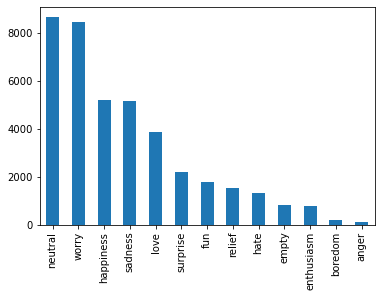

In [8]:
df['sentiment'].value_counts().plot(kind='bar')

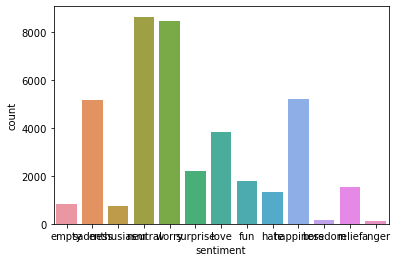

In [9]:
sns.countplot(df['sentiment'])

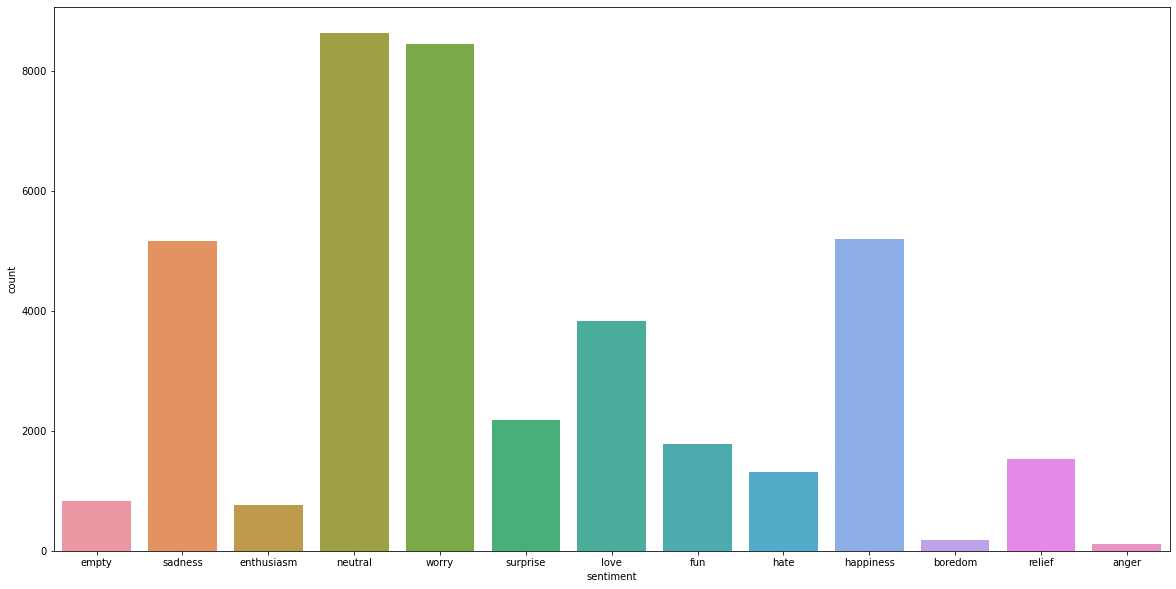

In [10]:
plt.figure(figsize=(20,10))
sns.countplot(x="sentiment", data=df)
plt.show()

In [11]:
from textblob import TextBlob

In [12]:
def get_sentiment(text):
  blob = TextBlob(text)
  sentiment= blob.sentiment.polarity
  if sentiment > 0:
    result="Positive"
  elif sentiment < 0:
    result="Negative"
  else:
    result="Neutral"
  return result

In [13]:
#testing the function
get_sentiment("i am in a great mood today")

'Positive'

In [14]:
df['Sentiment']= df['content'].apply(get_sentiment)

In [15]:
df.head()

,tweet_id,sentiment,content,Sentiment
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,Negative
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Neutral
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Neutral
3,1956967789,enthusiasm,wants to hang out with friends SOON!,Positive
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,Neutral


In [16]:
df.groupby(['sentiment', 'Sentiment']).size()

sentiment   Sentiment
anger       Negative       34
            Neutral        41
            Positive       35
boredom     Negative       80
            Neutral        56
            Positive       43
empty       Negative      168
            Neutral       418
            Positive      241
enthusiasm  Negative      100
            Neutral       254
            Positive      405
fun         Negative      205
            Neutral       474
            Positive     1097
happiness   Negative      345
            Neutral      1224
            Positive     3640
hate        Negative      694
            Neutral       364
            Positive      265
love        Negative      214
            Neutral       684
            Positive     2944
neutral     Negative     1156
            Neutral      4442
            Positive     3040
relief      Negative      207
            Neutral       477
            Positive      842
sadness     Negative     1886
            Neutral      1696
            Positi

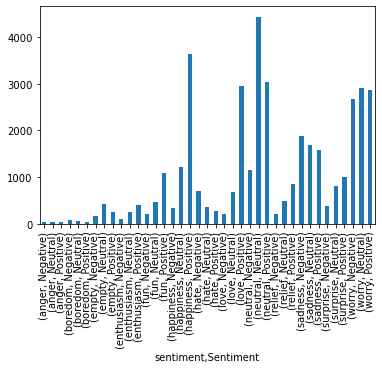

In [17]:
df.groupby(['sentiment', 'Sentiment']).size().plot(kind="bar")

D:\python\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\python\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


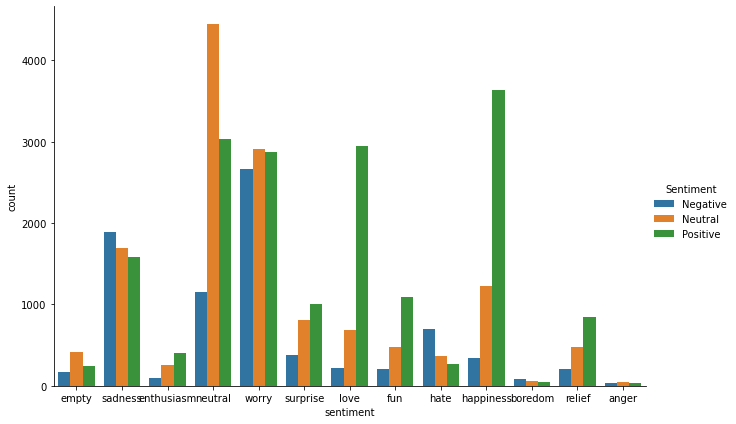

In [18]:
sns.factorplot(x='sentiment', hue='Sentiment', data=df, kind='count', size=6, aspect=1.5)

In [19]:
df['Clean_Text']=df['content'].apply(nfx.remove_stopwords)
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_punctuations)
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_userhandles)

In [20]:
df[['content', 'Clean_Text']]

,content,Clean_Text
0,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started frea...
1,Layin n bed with a headache ughhhh...waitin o...,Layin n bed headache ughhhhwaitin call
2,Funeral ceremony...gloomy friday...,Funeral ceremonygloomy friday
3,wants to hang out with friends SOON!,wants hang friends SOON
4,@dannycastillo We want to trade with someone w...,want trade Houston tickets will
...,...,...
39995,@JohnLloydTaylor,
39996,Happy Mothers Day All my love,Happy Mothers Day love
39997,Happy Mother's Day to all the mommies out ther...,Happy Mothers Day mommies there woman man long...
39998,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,WASSUP BEAUTIFUL FOLLOW ME PEEP NEW HIT SING...


In [21]:
from collections import Counter

In [22]:
def extract_keywords(text, num=50):
  tokens = [tok for tok in text.split()]
  most_common_tokens= Counter(tokens).most_common(num)
  return dict(most_common_tokens)

In [23]:
emotion_list = df['sentiment'].unique().tolist()

In [24]:
emotion_list

['empty',
 'sadness',
 'enthusiasm',
 'neutral',
 'worry',
 'surprise',
 'love',
 'fun',
 'hate',
 'happiness',
 'boredom',
 'relief',
 'anger']

In [25]:
love_list = df[df['sentiment']== 'love']['Clean_Text'].tolist()

In [26]:
love_docx=' '.join(love_list)

In [27]:
love_docx

'  agreed   correct ADORE him plucked arm cuz cryin better now Hahaha   sounds good Appreciate suggestion week were offline Time ask refund Pats philly 2 am love it Mmm cheesesteak Miss boyfriend love vacation   thanks neemah Im gonna soooo close izzy far   missed game   love song quottogetherquot thats quothisquot song mewell think want Peru summer ahhhhhhh Hopefully Yesyesyes miss there Pug woke incredible sleep   cant wait hear new album im sure amazingplease replay love much theres android twitter app Tweeties calibre pics uploaded baby pics cats Missy adult pretty little kitty Batty kitten heaven Photo: martwo: OMG love you accadentally deleted photo yay hes beautiful http://tumblrcom/xvd1wankt good time Rocking @ open mic thanks 4 love n support working Business plan presentation CG 2nite   Oh love em think kind preservatives theyre stay quotjustbakedquot kinda makes sick   LOL true Maybe year loooved siggy remember password mod thing Cake Hahaha Alright  wants friends ) http://p

In [28]:
keyword_love= extract_keywords(love_docx)

In [29]:
keyword_love

{'love': 695,
 'day': 471,
 'Happy': 317,
 'Mothers': 262,
 'mothers': 261,
 'Day': 250,
 'good': 249,
 'happy': 231,
 'Im': 187,
 'like': 175,
 'u': 159,
 'you': 155,
 'im': 132,
 'great': 126,
 'amp': 119,
 'time': 117,
 'new': 112,
 'today': 110,
 'it': 105,
 'thanks': 104,
 'Love': 103,
 'got': 103,
 'mom': 95,
 'lt3': 94,
 'know': 91,
 'night': 91,
 'best': 90,
 'lol': 89,
 'miss': 88,
 '2': 82,
 'Thanks': 82,
 'want': 81,
 'haha': 81,
 'awesome': 81,
 'going': 80,
 'hope': 77,
 'nice': 77,
 'cant': 75,
 'amazing': 75,
 'lovely': 73,
 'cute': 72,
 'fun': 72,
 'home': 67,
 'better': 66,
 'think': 66,
 'morning': 66,
 'Good': 66,
 'moms': 64,
 'work': 63,
 'me': 61}

In [30]:
def plot_common_words(mydict,emotion_name):
  df_01= pd.DataFrame(mydict.items(), columns=['token','count'])
  plt.figure(figsize=(20,10))
  plt.title("Plot of {}".format(emotion_name))
  sns.barplot(x='token', y='count', data=df_01)
  plt.xticks(rotation=45)
  plt.show()

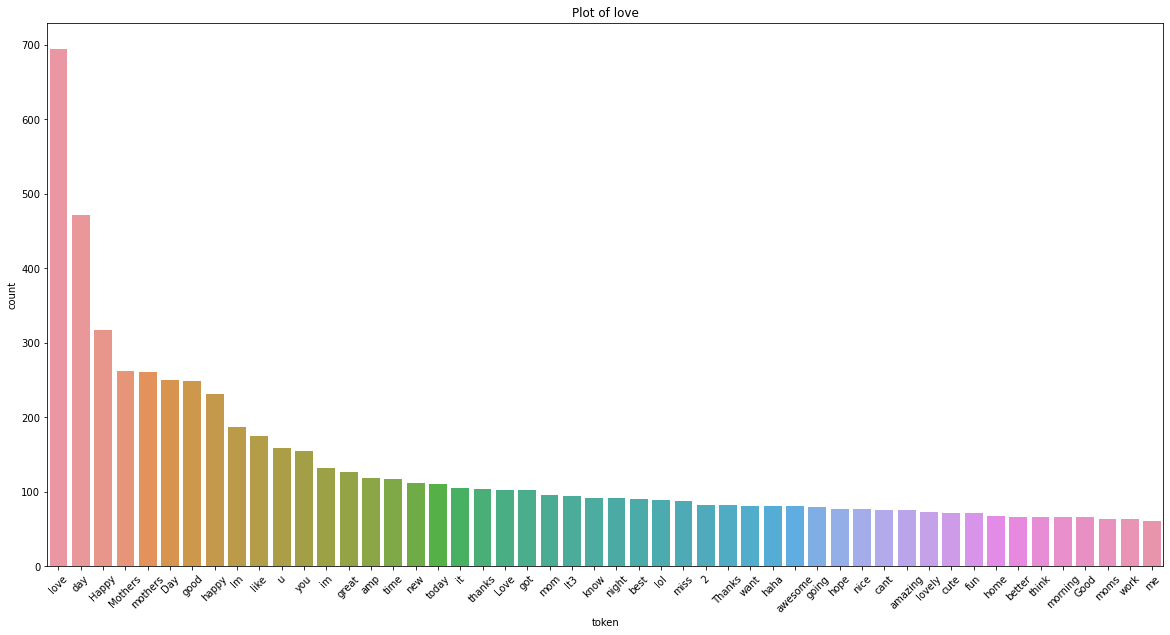

In [31]:
plot_common_words(keyword_love, "love")

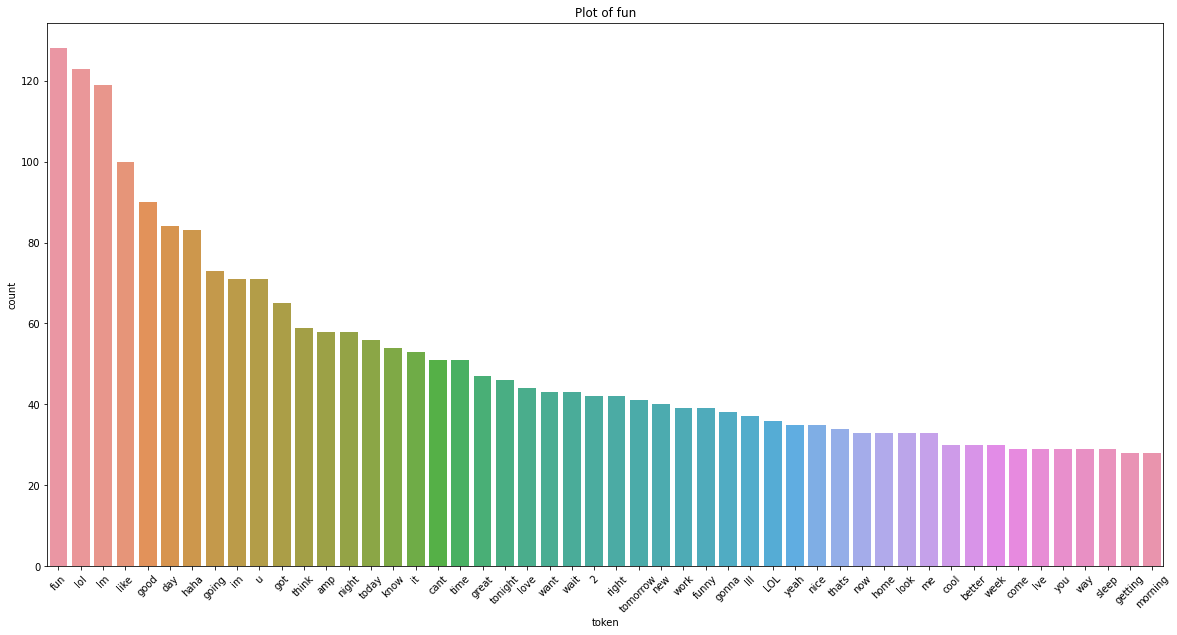

In [32]:
fun_list = df[df['sentiment']== 'fun']['Clean_Text'].tolist()
fun_docx=' '.join(fun_list)
keyword_fun= extract_keywords(fun_docx)
plot_common_words(keyword_fun, 'fun')

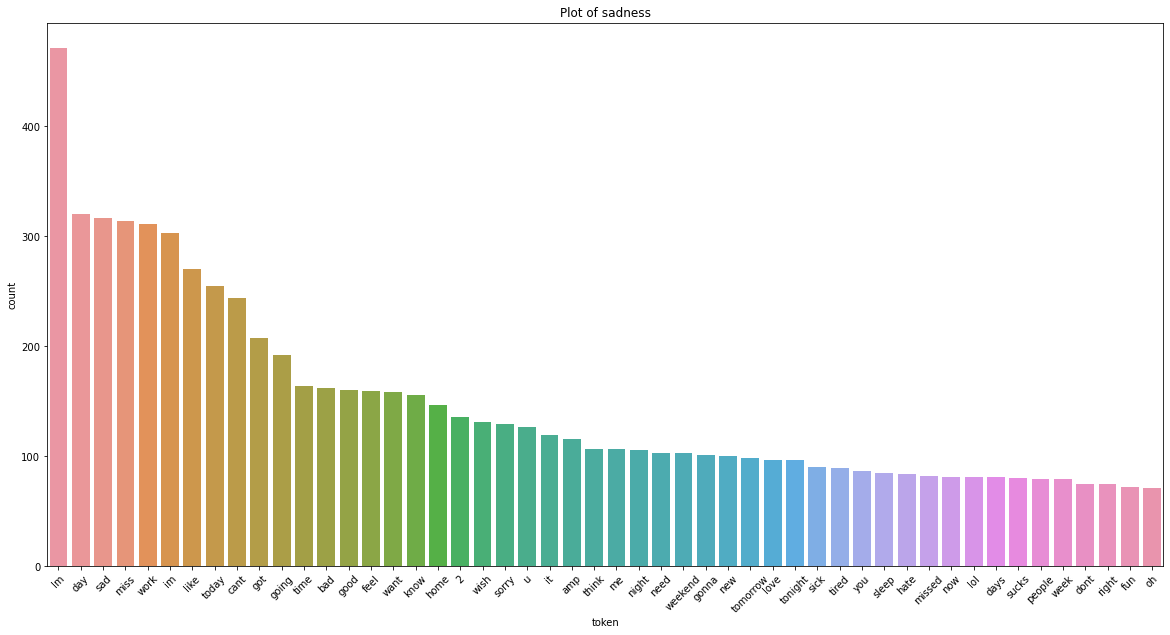

In [33]:
sadness_list = df[df['sentiment']== 'sadness']['Clean_Text'].tolist()
sadness_docx=' '.join(sadness_list)
keyword_sadness= extract_keywords(sadness_docx)
plot_common_words(keyword_sadness, 'sadness')

In [34]:
from wordcloud import WordCloud

In [43]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: kiwisolver>=1.0.1 in d:\python\lib\site-packages (from matplotlib->wordcloud) (1.2.0)



You should consider upgrading via the 'D:\python\python.exe -m pip install --upgrade pip' command.


In [35]:
def plot_wordcloud(docx):
  mywordcloud= WordCloud().generate(docx)
  plt.figure(figsize=(20,10))
  plt.imshow(mywordcloud,interpolation='bilinear')
  plt.axis('off')
  plt.show()

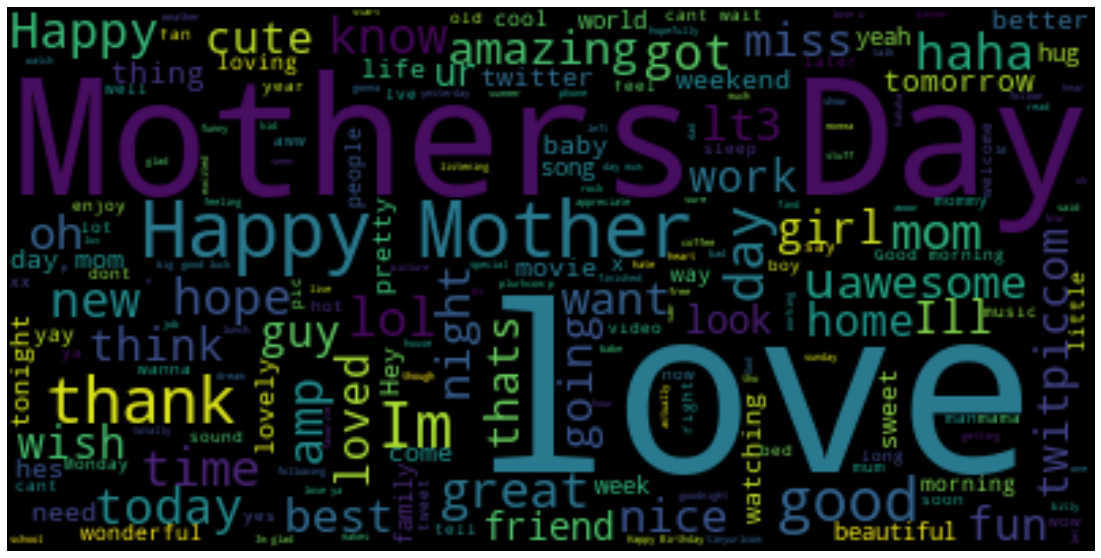

In [36]:
plot_wordcloud(love_docx)

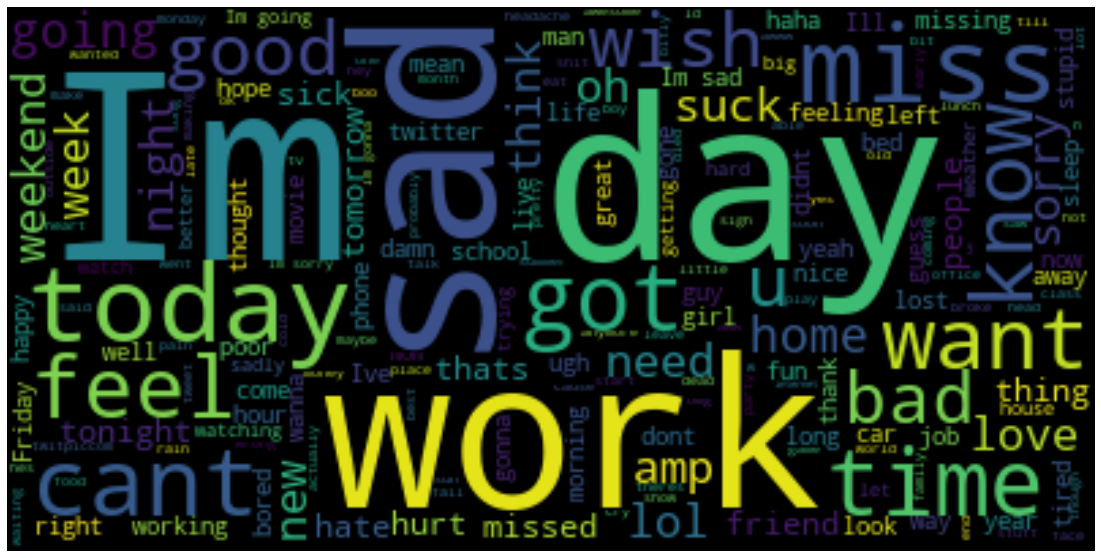

In [37]:
plot_wordcloud(sadness_docx)

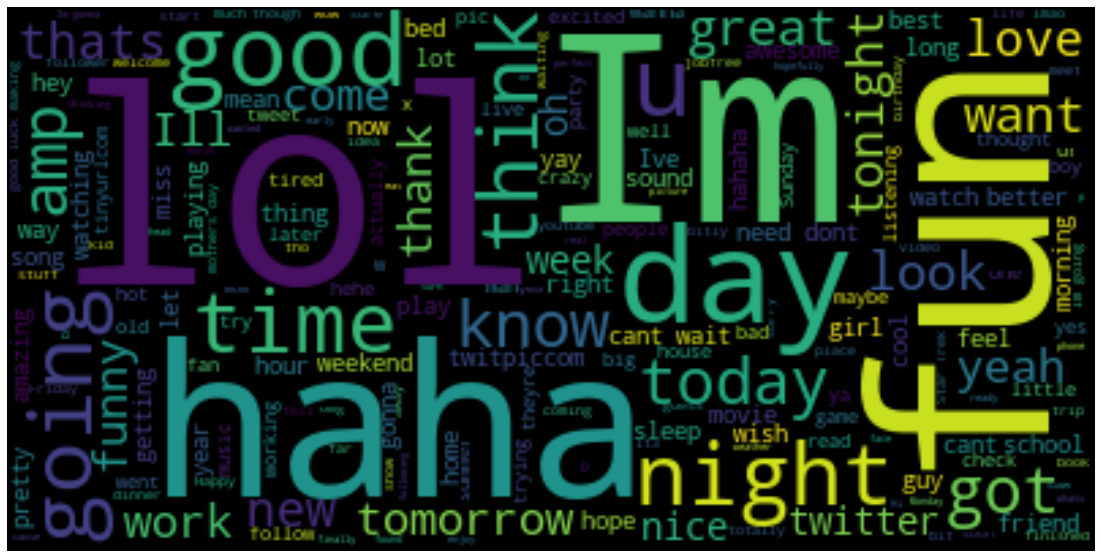

In [38]:
plot_wordcloud(fun_docx)

In [39]:
# loading ml packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

#Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,plot_confusion_matrix

In [57]:
pip install --upgrade scikit-learn

You should consider upgrading via the 'D:\python\python.exe -m pip install --upgrade pip' command.


In [40]:
#splitting our dataset
from sklearn.model_selection import train_test_split

In [41]:
Xfeatures = df['Clean_Text']
ylabels = df['sentiment']

In [42]:
Xfeatures

0          know listenin bad habit earlier started frea...
1                   Layin n bed headache ughhhhwaitin call
2                            Funeral ceremonygloomy friday
3                                  wants hang friends SOON
4                          want trade Houston tickets will
                               ...                        
39995                                                     
39996                               Happy Mothers Day love
39997    Happy Mothers Day mommies there woman man long...
39998      WASSUP BEAUTIFUL FOLLOW ME PEEP NEW HIT SING...
39999      bullet train tokyo gf visiting japan thursda...
Name: Clean_Text, Length: 40000, dtype: object

In [43]:
cv = CountVectorizer()
X= cv.fit_transform(Xfeatures)

In [44]:
#getting features by name
cv.get_feature_names()

D:\python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '002',
 '006',
 '00am',
 '00pm',
 '01',
 '010',
 '02',
 '023',
 '024',
 '0255',
 '02mxjj',
 '03',
 '04',
 '04182012154',
 '05',
 '050',
 '050809',
 '053agj',
 '05ixbj',
 '06',
 '0600',
 '06am',
 '07',
 '0783l',
 '079ï',
 '07am',
 '07i',
 '07jzs',
 '07k6e',
 '07k6x',
 '07kbp',
 '07kbq',
 '07kbr',
 '07kjr',
 '07xfs',
 '07xoh',
 '07xoi',
 '07yez',
 '08',
 '080509',
 '080809',
 '08kaifj',
 '09',
 '0930',
 '097dfj',
 '0a7v3j',
 '0ayzyj',
 '0egwanj',
 '0f',
 '0gmunj',
 '0guyoj',
 '0kenjoy',
 '0l2tsj',
 '0ltrdaj',
 '0mqko',
 '0n',
 '0o',
 '0quot',
 '0rpm',
 '0s',
 '0t2b6j',
 '0ut',
 '0wvnpj',
 '0xhu5j',
 '0xoxij',
 '0zr2jqj',
 '0zywwj',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '10000000000',
 '100000000000000000000000000000000000',
 '10000th',
 '1000th',
 '1000x',
 '1008',
 '100greatestgames',
 '100msg',
 '100th',
 '100word',
 '100x',
 '101',
 '1010',
 '1011',
 '1011pm',
 '1012',
 '1015',
 '1017',
 '102',
 '1027',
 '1029',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '1034415'

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3, random_state=42)

In [46]:
nv_model= MultinomialNB()
nv_model.fit(X_train , y_train)

MultinomialNB()

In [47]:
nv_model.score(X_test,y_test)

0.31575

In [48]:
y_pred_nv = nv_model.predict(X_test)
y_pred_nv

array(['happiness', 'neutral', 'worry', ..., 'worry', 'neutral',
       'sadness'], dtype='<U10')

In [49]:
sample_text= ["I am a bit sad"]

In [50]:
vect =cv.transform(sample_text).toarray()

In [51]:
nv_model.predict(vect)

array(['worry'], dtype='<U10')

In [52]:
nv_model.predict_proba(vect)

array([[8.02383026e-07, 1.24324514e-06, 2.94968340e-05, 1.91162476e-05,
        5.55297455e-04, 9.17198481e-03, 2.22161253e-04, 5.42204324e-03,
        2.19908684e-02, 1.37351965e-03, 2.53038088e-01, 5.57986254e-03,
        7.02595516e-01]])

In [53]:
nv_model.classes_

array(['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
       'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise',
       'worry'], dtype='<U10')

In [54]:
np.max(nv_model.predict_proba(vect))

0.7025955162742418

In [55]:
def predict_emotion(sample_text,model):
  myvect =cv.transform(sample_text).toarray()
  prediction=model.predict(myvect)
  pred_proba=(model.predict_proba(myvect))
  pred_precentage_all=dict(zip(model.classes_,pred_proba[0]))
  print("prediction : {}, Prediction Score :{}".format(prediction[0], np.max(pred_proba)))
  print(prediction[0])
  return pred_precentage_all

In [56]:
predict_emotion(sample_text,nv_model)

prediction : worry, Prediction Score :0.7025955162742418
worry


{'anger': 8.023830258632391e-07,
 'boredom': 1.2432451435521445e-06,
 'empty': 2.9496834043175524e-05,
 'enthusiasm': 1.9116247623960817e-05,
 'fun': 0.00055529745509502,
 'happiness': 0.009171984813422563,
 'hate': 0.00022216125276927688,
 'love': 0.005422043237712547,
 'neutral': 0.021990868365441514,
 'relief': 0.001373519652947332,
 'sadness': 0.25303808769472136,
 'surprise': 0.0055798625438106715,
 'worry': 0.7025955162742418}

In [57]:
print(classification_report(y_test , y_pred_nv))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        33
     boredom       0.00      0.00      0.00        57
       empty       0.25      0.00      0.01       242
  enthusiasm       0.00      0.00      0.00       249
         fun       0.08      0.00      0.00       513
   happiness       0.33      0.34      0.33      1568
        hate       0.33      0.01      0.02       383
        love       0.47      0.33      0.39      1134
     neutral       0.34      0.39      0.36      2620
      relief       0.00      0.00      0.00       515
     sadness       0.32      0.14      0.20      1560
    surprise       0.20      0.01      0.02       625
       worry       0.28      0.65      0.39      2501

    accuracy                           0.32     12000
   macro avg       0.20      0.14      0.13     12000
weighted avg       0.29      0.32      0.27     12000



D:\python\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\python\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\python\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
confusion_matrix(y_test, y_pred_nv)

array([[   0,    0,    0,    0,    0,    4,    0,    1,    7,    0,    5,
           0,   16],
       [   0,    0,    0,    0,    0,    2,    0,    2,   12,    0,    4,
           0,   37],
       [   0,    0,    1,    0,    0,   17,    0,    3,   92,    0,   11,
           0,  118],
       [   0,    0,    0,    0,    1,   41,    0,    4,   82,    0,   11,
           0,  110],
       [   0,    0,    0,    0,    1,  112,    1,   23,  142,    0,   20,
           1,  213],
       [   0,    0,    0,    0,    3,  527,    0,  151,  382,    1,   33,
           7,  464],
       [   0,    0,    0,    0,    0,   15,    3,    3,   76,    0,   50,
           3,  233],
       [   0,    0,    0,    0,    0,  246,    0,  376,  194,    0,   33,
           2,  283],
       [   0,    0,    1,    0,    6,  256,    2,   91, 1021,    1,  105,
           5, 1132],
       [   0,    0,    0,    0,    1,   88,    0,   30,  135,    0,   24,
           0,  237],
       [   0,    0,    1,    0,    0,   70,    0, 

D:\python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


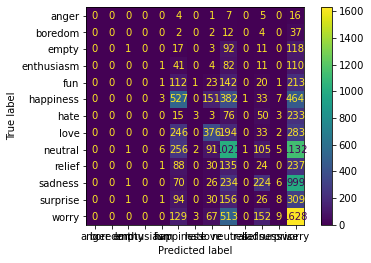

In [59]:
plot_confusion_matrix(nv_model, X_test, y_test)

In [60]:
import joblib

In [61]:
model_file= open('emotion_Class_30_07.pkl',"wb")
joblib.dump(nv_model, model_file)
model_file.close()

In [62]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

D:\python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
lr_model.score(X_test,y_test)

0.3328333333333333

In [64]:
predict_emotion(sample_text , lr_model)

prediction : worry, Prediction Score :0.5426109080373418
worry


{'anger': 0.0008706270089579634,
 'boredom': 0.0006613975535996996,
 'empty': 0.0032811767649990123,
 'enthusiasm': 0.0021665391967435788,
 'fun': 0.005201936316493153,
 'happiness': 0.012019574218147835,
 'hate': 0.006979545685338366,
 'love': 0.007436518755633573,
 'neutral': 0.023982401488024097,
 'relief': 0.017244783516276542,
 'sadness': 0.34567818067597306,
 'surprise': 0.03186641078247136,
 'worry': 0.5426109080373418}

In [132]:
y_pred_lr = lr_model.predict(X_test)
y_pred_lr

array(['neutral', 'neutral', 'worry', ..., 'neutral', 'neutral',
       'sadness'], dtype=object)

In [134]:
print(classification_report(y_test , y_pred_lr))

D:\python\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\python\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        33
     boredom       0.00      0.00      0.00        57
       empty       0.09      0.01      0.02       242
  enthusiasm       0.24      0.02      0.03       249
         fun       0.13      0.05      0.08       513
   happiness       0.33      0.32      0.33      1568
        hate       0.34      0.17      0.23       383
        love       0.43      0.39      0.41      1134
     neutral       0.35      0.56      0.43      2620
      relief       0.23      0.05      0.09       515
     sadness       0.31      0.26      0.29      1560
    surprise       0.19      0.08      0.11       625
       worry       0.33      0.40      0.36      2501

    accuracy                           0.33     12000
   macro avg       0.23      0.18      0.18     12000
weighted avg       0.31      0.33      0.31     12000



D:\python\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [115]:
predict_emotion(["i am happy today"], nv_model)

prediction : happiness, Prediction Score :0.4214111806804279
happiness


{'anger': 1.3949247221704296e-07,
 'boredom': 3.025894943915117e-06,
 'empty': 6.837277078623344e-05,
 'enthusiasm': 8.972954184591248e-05,
 'fun': 0.003649106357044274,
 'happiness': 0.4214111806804279,
 'hate': 0.0002317333845362546,
 'love': 0.15697946645402702,
 'neutral': 0.0896030313653845,
 'relief': 0.0064164478959861685,
 'sadness': 0.06749625814753592,
 'surprise': 0.0046874031153310335,
 'worry': 0.24936410489967809}

In [120]:
predict_emotion(["Do not talk to me!"], nv_model)

prediction : worry, Prediction Score :0.6758925476096755
worry


{'anger': 2.3353743486178826e-08,
 'boredom': 4.991106866562868e-07,
 'empty': 2.231462636905254e-06,
 'enthusiasm': 1.1501150740235861e-05,
 'fun': 0.0008189605109185211,
 'happiness': 0.001431737763069026,
 'hate': 5.807972707701251e-05,
 'love': 0.0024326634835127405,
 'neutral': 0.25184261893293447,
 'relief': 0.00029924464484717533,
 'sadness': 0.06295989236618751,
 'surprise': 0.004249999883970753,
 'worry': 0.6758925476096755}

In [118]:
predict_emotion(["i have to work every day"], nv_model)

prediction : sadness, Prediction Score :0.39587687159830887
sadness


{'anger': 1.7660552228795062e-07,
 'boredom': 9.098931259947375e-07,
 'empty': 7.31239243788201e-05,
 'enthusiasm': 0.0003805109216793576,
 'fun': 0.0007098173500909798,
 'happiness': 0.03916501440531545,
 'hate': 0.0010131778959627292,
 'love': 0.023177140099599137,
 'neutral': 0.22045942286520803,
 'relief': 0.006867412044528815,
 'sadness': 0.39587687159830887,
 'surprise': 0.003728004221596858,
 'worry': 0.3085484181746809}

In [119]:
predict_emotion(["Do not talk to me!"], lr_model)

prediction : worry, Prediction Score :0.44083488712499347
worry


{'anger': 0.0015167399982656837,
 'boredom': 0.005629495799676714,
 'empty': 0.002893638520101989,
 'enthusiasm': 0.008087396511984866,
 'fun': 0.023336428346419698,
 'happiness': 0.00853135276651746,
 'hate': 0.007618228627360264,
 'love': 0.014430455635137125,
 'neutral': 0.23064820779425907,
 'relief': 0.036782078043259336,
 'sadness': 0.06784553106292678,
 'surprise': 0.15184555976909764,
 'worry': 0.44083488712499347}

In [116]:
predict_emotion(["i am happy today"], lr_model)

prediction : happiness, Prediction Score :0.41481954987868985
happiness


{'anger': 0.0006646851253482001,
 'boredom': 0.003963719687721676,
 'empty': 0.010468080333364854,
 'enthusiasm': 0.009571365173833564,
 'fun': 0.029376072507534687,
 'happiness': 0.41481954987868985,
 'hate': 0.008823774284076042,
 'love': 0.08768896351302244,
 'neutral': 0.07888071553842149,
 'relief': 0.09369535976988848,
 'sadness': 0.07001508691478851,
 'surprise': 0.02009449678509629,
 'worry': 0.17193813048821377}

In [117]:
predict_emotion(["i have to work every day"], lr_model)

prediction : neutral, Prediction Score :0.3125227746422712
neutral


{'anger': 0.0007773597217882202,
 'boredom': 0.0007761187273994355,
 'empty': 0.007656485589497705,
 'enthusiasm': 0.021360867310158255,
 'fun': 0.005297687155294525,
 'happiness': 0.026568647042226473,
 'hate': 0.01815471017374642,
 'love': 0.007994334885821866,
 'neutral': 0.3125227746422712,
 'relief': 0.06905437534043474,
 'sadness': 0.22468990997382082,
 'surprise': 0.041726128955405235,
 'worry': 0.2634206004821352}

D:\python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


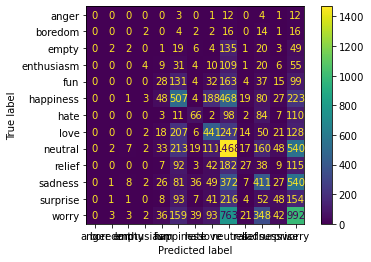

In [70]:
plot_confusion_matrix(lr_model, X_test, y_test)

In [71]:
import keras
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Conv1D,Flatten
from keras.layers import Embedding

In [72]:
VOCABULARY_SIZE = 2000
MAX_LENGTH = 60

In [73]:
from nltk.tokenize import word_tokenize
import re
import nltk
from keras.preprocessing.text import Tokenizer

In [74]:
df.rename(columns = {'Clean_Text':'Text'}, inplace = True)
df.head()

,tweet_id,sentiment,content,Sentiment,Text
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,Negative,know listenin bad habit earlier started frea...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Neutral,Layin n bed headache ughhhhwaitin call
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Neutral,Funeral ceremonygloomy friday
3,1956967789,enthusiasm,wants to hang out with friends SOON!,Positive,wants hang friends SOON
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,Neutral,want trade Houston tickets will


In [75]:
from sklearn import preprocessing
   
label_encoder = preprocessing.LabelEncoder()#标准化标签
labels = label_encoder.fit_transform(df.sentiment.values)
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [76]:
print(labels)

[ 2 10 10 ...  7  5  7]


In [77]:
X = df['Text'] 

In [78]:
X

0          know listenin bad habit earlier started frea...
1                   Layin n bed headache ughhhhwaitin call
2                            Funeral ceremonygloomy friday
3                                  wants hang friends SOON
4                          want trade Houston tickets will
                               ...                        
39995                                                     
39996                               Happy Mothers Day love
39997    Happy Mothers Day mommies there woman man long...
39998      WASSUP BEAUTIFUL FOLLOW ME PEEP NEW HIT SING...
39999      bullet train tokyo gf visiting japan thursda...
Name: Text, Length: 40000, dtype: object

In [79]:
xtrain, xtest, ytrain, ytest = train_test_split(X, labels, random_state=42, test_size=0.3, stratify=labels ,shuffle=True)

In [80]:
VOCABULARY_SIZE = 2000
MAX_LENGTH = 60

In [81]:
tokenizer = Tokenizer(num_words=VOCABULARY_SIZE)#只考虑前2000个最常见的单词
tokenizer.fit_on_texts(list(xtrain) + list(xtest))#建立字典，构建单词索引

In [82]:
xtrain_sequence = tokenizer.texts_to_sequences(xtrain) # 将字符串转换为整数索引组成的列表
xtest_sequence = tokenizer.texts_to_sequences(xtest)

In [84]:
from tensorflow.keras.preprocessing import sequence
xtrain_padding = sequence.pad_sequences(xtrain_sequence, maxlen=MAX_LENGTH)# 该函数是将序列转化为经过填充以后的一个长度相同的新序列新序列。
xtest_padding = sequence.pad_sequences(xtest_sequence, maxlen=MAX_LENGTH)
word_index = tokenizer.word_index

In [85]:
xtrain_padding

array([[   0,    0,    0, ...,   23,  789,  399],
       [   0,    0,    0, ...,  504,   51, 1327],
       [   0,    0,    0, ...,  220,  327, 1584],
       ...,
       [   0,    0,    0, ...,   35,  227, 1695],
       [   0,    0,    0, ...,   77,   15,   75],
       [   0,    0,    0, ...,    0,    0,  147]])

In [86]:
xtest_padding

array([[   0,    0,    0, ...,   21,   45,   67],
       [   0,    0,    0, ...,    0,    0,   54],
       [   0,    0,    0, ...,  332,  689,  765],
       ...,
       [   0,    0,    0, ...,   59,  753,  105],
       [   0,    0,    0, ..., 1225,   36,  622],
       [   0,    0,    0, ...,    0,  688,   41]])

In [88]:
from tqdm import tqdm
#在Keras中使用预训练的词向量
embeddings_index = {}
f = open('C:/Users/16367/Desktop/glove.6B.100d.txt',encoding='utf8')#用100d的词向量文件。
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

400000it [00:20, 19625.15it/s]

Found 400000 word vectors.


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn import preprocessing
from tqdm import tqdm
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [89]:
#embedding层的参数设置
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

100%|████████████████████████████████████████████████████████████████████████| 37237/37237 [00:00<00:00, 267600.28it/s]


In [100]:
num_classes = 13
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.layers.recurrent import LSTM, GRU
model = Sequential()#顺序模型
#单层LSTM
model.add(Embedding(len(word_index) + 1,#词汇量
 100,#嵌入单词的向量空间的大小，100维
 weights=[embedding_matrix],#权重矩阵
 input_length=MAX_LENGTH,#输入序列的长度
 trainable=False))
model.add(SpatialDropout1D(0.3))#加SpatialDropout1D层，断开链接比例0.3
#双向LSTM层
model.add(Bidirectional(LSTM(100, dropout=0.3, recurrent_dropout=0.3)))
#第一个全全连接层
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))#dropout作用域隐藏层，丢弃率80%
#第二个全连接层
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))
#输出层
model.add(Dense(num_classes))
model.add(Activation('softmax'))
#编译
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#输出模型各层参数状况
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 60, 100)           3723800   
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 60, 100)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200)               160800    
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              205824    
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)             

In [101]:
ytrain_encode = np_utils.to_categorical(ytrain)#将整型的类别标签转为独热编码
ytest_encode = np_utils.to_categorical(ytest)

In [102]:
ytrain_encode

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [103]:
ytest_encode

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [104]:
batch_size = 512#一次训练所使用的样本量
epochs = 15#轮15次

history = model.fit(xtrain_padding, ytrain_encode, 
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(xtest_padding, ytest_encode))

Epoch 1/15
55/55 [==============================] - 100s 2s/step - loss: 2.2805 - accuracy: 0.2014 - val_loss: 2.1004 - val_accuracy: 0.2777
Epoch 2/15
55/55 [==============================] - 90s 2s/step - loss: 2.1227 - accuracy: 0.2597 - val_loss: 2.0358 - val_accuracy: 0.3062
Epoch 3/15
55/55 [==============================] - 95s 2s/step - loss: 2.0812 - accuracy: 0.2812 - val_loss: 2.0201 - val_accuracy: 0.3122
Epoch 4/15
55/55 [==============================] - 104s 2s/step - loss: 2.0540 - accuracy: 0.2903 - val_loss: 2.0043 - val_accuracy: 0.3245
Epoch 5/15
55/55 [==============================] - 108s 2s/step - loss: 2.0316 - accuracy: 0.3055 - val_loss: 1.9917 - val_accuracy: 0.3276
Epoch 6/15
55/55 [==============================] - 111s 2s/step - loss: 2.0224 - accuracy: 0.3048 - val_loss: 1.9822 - val_accuracy: 0.3289
Epoch 7/15
55/55 [==============================] - 116s 2s/step - loss: 2.0059 - accuracy: 0.3118 - val_loss: 1.9739 - val_accuracy: 0.3324
Epoch 8/15
55/5

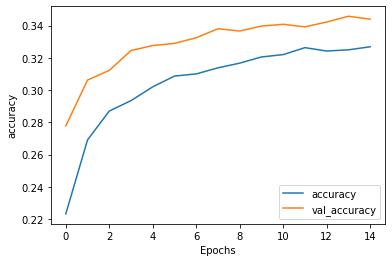

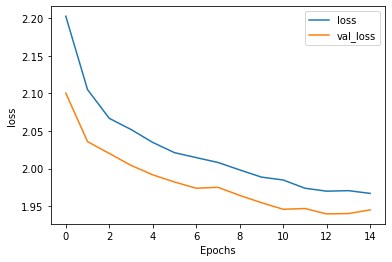

In [105]:
def graph_plots(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    #plt.title('model accuracy')
    plt.legend([string, 'val_'+string])
    plt.show()
    
graph_plots(history, "accuracy")
graph_plots(history, "loss")

In [106]:
loss, accuracy = model.evaluate(xtrain_padding, ytrain_encode, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(xtest_padding, ytest_encode, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.3557
Testing Accuracy:  0.3439


In [109]:
class_names = ['neutral','worry','happiness', 'sadness', 'love', 'surprise','fun','relief','hate','empty','enthusiasm','boredom','anger']

In [112]:
import time

message = ['i am happy today']

seq = tokenizer.texts_to_sequences(message)
padded = pad_sequences(seq, maxlen=MAX_LENGTH)

start_time = time.time()
pred = model.predict(padded)

print('Message: ' + str(message))
print('predicted: {} ({:.2f} seconds)'.format(class_names[np.argmax(pred)], (time.time() - start_time)))

Message: ['i am happy today']
predicted: surprise (0.08 seconds)


In [113]:
import time

message = ['i have to work every day']

seq = tokenizer.texts_to_sequences(message)
padded = pad_sequences(seq, maxlen=MAX_LENGTH)

start_time = time.time()
pred = model.predict(padded)

print('Message: ' + str(message))
print('predicted: {} ({:.2f} seconds)'.format(class_names[np.argmax(pred)], (time.time() - start_time)))

Message: ['i have to work every day']
predicted: hate (0.09 seconds)


In [114]:
import time

message = ['Do not talk to me!']

seq = tokenizer.texts_to_sequences(message)
padded = pad_sequences(seq, maxlen=MAX_LENGTH)

start_time = time.time()
pred = model.predict(padded)

print('Message: ' + str(message))
print('predicted: {} ({:.2f} seconds)'.format(class_names[np.argmax(pred)], (time.time() - start_time)))

Message: ['do not  talk to me!']
predicted: hate (0.08 seconds)
